In [3]:
%config Completer.use_jedi = True

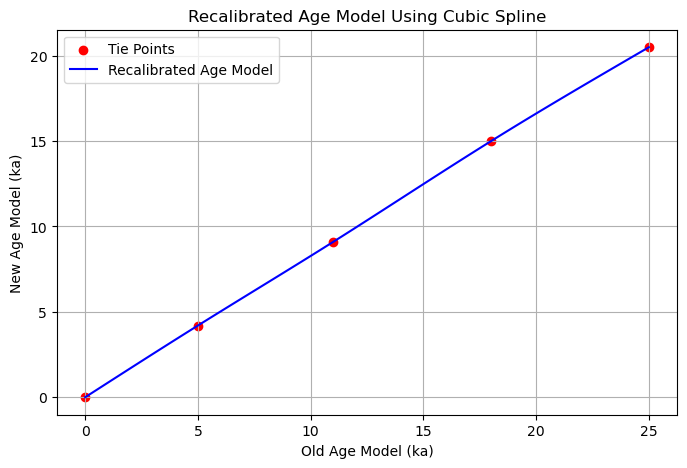

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Tie point data
depths = np.array([0, 50, 120, 200, 300])  # Depths (cm)
old_ages = np.array([0, 5.0, 11.0, 18.0, 25.0])  # Old age model (ka)
new_ages = np.array([0, 4.2, 9.1, 15.0, 20.5])  # New recalibrated ages (ka)

# Fit a cubic spline from old to new age model
spline_model = CubicSpline(old_ages, new_ages, bc_type='natural')

# Generate recalibrated ages for continuous depths
depth_range = np.linspace(0, 300, 100)
old_age_interpolated = np.linspace(0, 25, 100)  # Old model's age scale
new_age_interpolated = spline_model(old_age_interpolated)

# Plot the recalibrated age model
plt.figure(figsize=(8, 5))
plt.scatter(old_ages, new_ages, color='red', label="Tie Points")
plt.plot(old_age_interpolated, new_age_interpolated, label="Recalibrated Age Model", color="blue")
plt.xlabel("Old Age Model (ka)")
plt.ylabel("New Age Model (ka)")
plt.legend()
plt.title("Recalibrated Age Model Using Cubic Spline")
plt.grid()
plt.show()


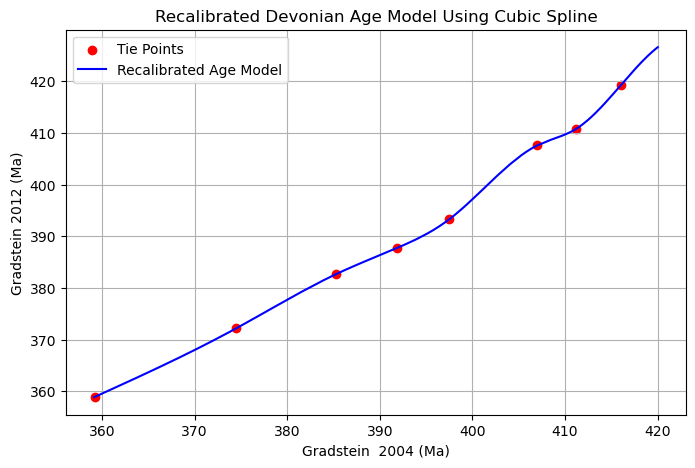

In [3]:
joachimski_data = np.loadtxt("agemodel_2004.csv", delimiter=",")  
grad_2004 = np.array([359.2, 374.5, 385.3, 391.8, 397.5, 407, 411.2, 416])  # Gradstein 2004 age model tiepoints Devonian Stage boundaries(Ma)
grad_2012 = np.array([358.9, 372.2, 382.7, 387.7, 393.3, 407.6, 410.8, 419.2])  # Gradstein 2012
grad_2020 = np.array([359.3, 371.1, 378.9, 385.3, 394.3, 410.5, 412.4, 419])
spline_model_12 = CubicSpline(grad_2004, grad_2012, bc_type='natural')

grad_2012_interp_joachimski = spline_model_12(joachimski_data)
np.savetxt("joachimski_2012.csv", grad_2012_interp_joachimski, delimiter=",")
plt.figure(figsize=(8, 5))
plt.scatter(grad_2004, grad_2012, color='red', label="Tie Points")
plt.plot(joachimski_data, grad_2012_interp_joachimski, label="Recalibrated Age Model", color="blue")
plt.xlabel("Gradstein  2004 (Ma)")
plt.ylabel("Gradstein 2012 (Ma)")
plt.legend()
plt.title("Recalibrated Devonian Age Model Using Cubic Spline")
plt.grid()
plt.show()

In [23]:
chen_data = np.loadtxt("chen_agemodel_2012.csv", delimiter=",")  

In [41]:


spline_model_20 = CubicSpline(grad_2012, grad_2020, bc_type='natural')
grad_2020_interp_joachimski = spline_model_20(grad_2012_interp_joachimski)


grad_2020_interp_chen = spline_model_20(chen_data)
print(grad_2020_interp_joachimski)
np.savetxt("joachimski_2020.csv", grad_2020_interp_joachimski, delimiter=",")
np.savetxt("chen_2020.csv", grad_2020_interp_chen, delimiter=",")

[359.25214019 359.44357915 359.53132116 359.69084893 359.76263454
 359.84239454 359.87429795 359.97798136 360.65576369 360.79924888
 360.93474392 361.07021888 361.15786755 361.31720348 361.82682393
 361.89845378 361.96211656 362.12123813 362.14510183 362.24054428
 362.39956917 362.8127374  362.82861918 362.91595574 362.97152163
 363.11436107 363.2729931  363.36813054 363.41568704 363.61374746
 363.66125913 363.70876162 363.74833991 363.81165143 363.81956416
 363.84330074 363.8749457  363.93031371 364.06472084 364.16744527
 364.19904244 364.309593   364.45163598 364.46741184 364.54627045
 364.59356881 364.66449217 364.68024891 364.74326108 364.79050443
 364.86134355 364.8770813  365.07366733 365.12866498 365.16793617
 365.19149367 365.37980904 365.37980904 365.37980904 365.52870223
 365.57568478 365.67741848 365.71652384 365.77906525 365.79469532
 365.84157265 365.88843045 365.90404533 365.91965799 365.96648259
 366.04447829 366.06786577 366.06786577 366.10683324 366.13020665
 366.17693

PermissionError: [Errno 13] Permission denied: 'joachimski_2020.csv'

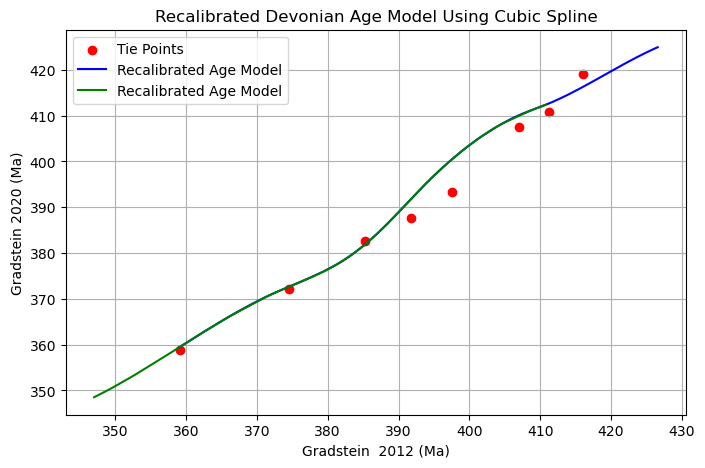

In [29]:
plt.figure(figsize=(8, 5))
plt.scatter(grad_2004, grad_2012, color='red', label="Tie Points")
plt.plot(grad_2012_interp_joachimski, grad_2020_interp_joachimski, label="Recalibrated Age Model", color="blue")
plt.plot(chen_data, grad_2020_interp_chen, label="Recalibrated Age Model", color="green")
plt.xlabel("Gradstein  2012 (Ma)")
plt.ylabel("Gradstein 2020 (Ma)")
plt.legend()
plt.title("Recalibrated Devonian Age Model Using Cubic Spline")
plt.grid()
plt.show()

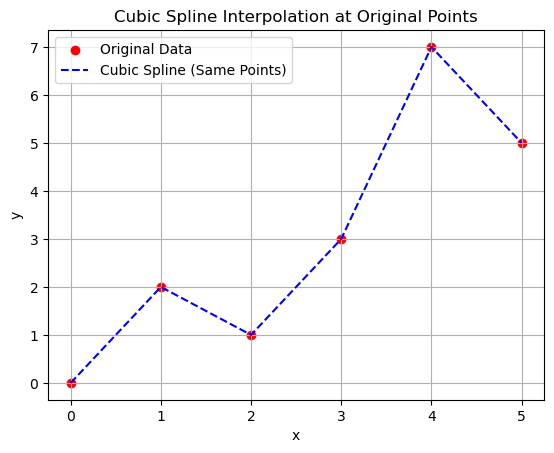

Original y: [0 2 1 3 7 5]
Spline y: [0. 2. 1. 3. 7. 5.]


In [33]:
# Original x and y data
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 2, 1, 3, 7, 5])

# Fit cubic spline
spline = CubicSpline(x, y, bc_type='natural')

# Evaluate spline ONLY at original x-values
y_spline = spline(x)

# Plot results
plt.scatter(x, y, color='red', label="Original Data")
plt.plot(x, y_spline, label="Cubic Spline (Same Points)", linestyle="dashed", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Cubic Spline Interpolation at Original Points")
plt.grid()
plt.show()

# Print the interpolated values
print("Original y:", y)
print("Spline y:", y_spline)